# Data ratio of credit form countries (Moodi's)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from scipy import stats as st

In [14]:
df_ratio = pd.read_excel('C:/GoogleDisk/2025/статьи/Визуализация анализа изменения кредитных рейтингов стран при помощи библиотек Python/Кредитные рейтинги.xlsx', header=0,  usecols="K:N", skiprows = 52)
df_rario_research = df_ratio.pivot(index='Country',columns='Year', values=['Score', 'Ratio']).sort_values(('Score', 2023)) #.reset_index().sort_values(('Score', 2021), inplace=True)
display(df_rario_research.head())
# df_ratio.pivot(index='Country',columns='Year', values=['Score', 'Ratio']).sort_values(('Score', 2021))

Score                Ratio                 
Year       2021 2023            2021             2023
Country                                              
Аргентина     1    1     Ca (Stable)      Ca (Stable)
Россия        9    2   Baa3 (Stable)  \tCa (Negative)
Турция        4    3   B2 (Negative)    B3 (Positive)
ЮАР           5    6  Ba2 (Negative)     Ba2 (Stable)
Бразилия      6    7    Ba2 (Stable)   Ba2 (Positive)

T статистика и p-value

In [15]:
df_rario_research[('m', 'diff')] = df_rario_research.loc[:, ('Score', 2023)] \
- df_rario_research.loc[:, ('Score', 2021)] # multyIndex colunms

m_avg = df_rario_research.m.mean()
n = df_rario_research.shape[0]
m_sigma = df_rario_research.m.std()
t_pair = m_avg/(m_sigma/(n**0.5))
print(t_pair)
t_stat_pair, p_val_pair = st.ttest_rel(df_rario_research.loc[:, ('Score', 2023)], \
                                       df_rario_research.loc[:, ('Score', 2021)])

print(f'T-статистика: {t_stat_pair:.2f} и p-value: {p_val_pair:.1%}')

Year
diff   -1.463159
dtype: object
T-статистика: -1.46 и p-value: 15.6%


VISUAL

C:\Users\aigna\AppData\Local\Temp\ipykernel_7888\887712555.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.add_line(mlines.Line2D([df_rario_research.loc[:, ('Score', 2021)][i], df_rario_research.loc[:, ('Score', 2023)][i]], [df_rario_research.index[i], df_rario_research.index[i]], color='#d3d3d3')) # x1 x2  y1 y2


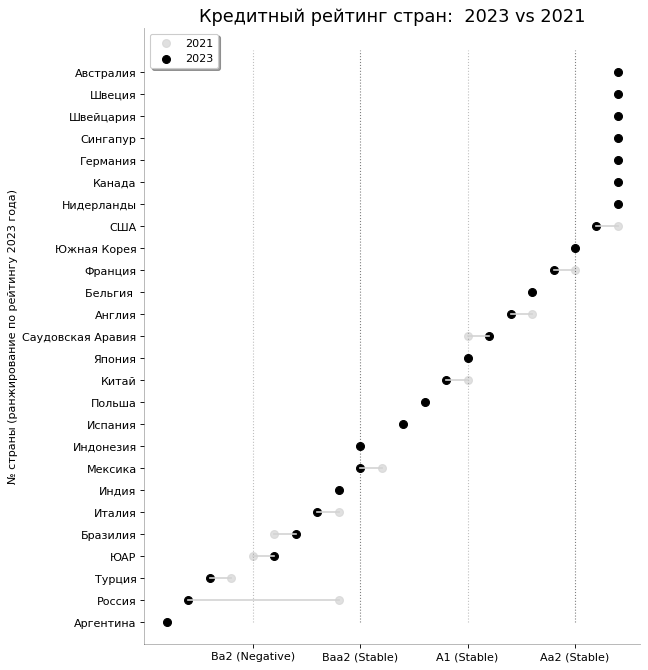

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(8,10), facecolor='#ffffff', dpi= 80)
# Vertical Lines
ax.vlines(x=5, ymin=0, ymax=26, color='black', alpha=.25, linewidth=1, linestyles='dotted')
ax.vlines(x=10, ymin=0, ymax=26, color='black', alpha=.5, linewidth=1, linestyles='dotted')
ax.vlines(x=15, ymin=0, ymax=26, color='black', alpha=.25, linewidth=1, linestyles='dotted')
ax.vlines(x=20, ymin=0, ymax=26, color='black', alpha=.5, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=df_rario_research.index, x=df_rario_research.loc[:, ('Score', 2021)], s=50, color='#d3d3d3', alpha=0.7, label = '2021')
ax.scatter(y=df_rario_research.index, x=df_rario_research.loc[:, ('Score', 2023)], s=50, color='#000000', alpha=1, label = '2023')

# lines for Diff
ax = plt.gca()
for i in range(df_rario_research.shape[0]):
    ax.add_line(mlines.Line2D([df_rario_research.loc[:, ('Score', 2021)][i], \
                               df_rario_research.loc[:, ('Score', 2023)][i]], [df_rario_research.index[i], df_rario_research.index[i]], color='#d3d3d3')) # x1 x2  y1 y2

ax.set_title("Кредитный рейтинг стран:  2023 vs 2021", fontdict={'size':16})
ax.set(ylabel='№ страны (ранжирование по рейтингу 2023 года)',  ylim=(-1, 27))
plt.legend(shadow = True, framealpha = 1, loc='upper left')
ax.set_xticks([5, 10, 15, 20])
ax.set_xticklabels(['Ba2 (Negative)', 'Baa2 (Stable)', 'A1 (Stable)', 'Aa2 (Stable)'])
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 